In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link

s_data = pd.read_csv('student_scores.csv')
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# shape :  returns the Row and Column of the given dataset.
s_data.shape

(25, 2)

In [4]:
#information about the DataFrame.
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
s_data.describe()   # statistical information

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the data on 2 dimensional graph to find the relationship between the variables.

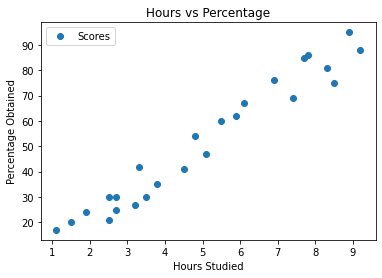

In [6]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Obtained')  
plt.show()

####  Data Preparaton for further Analysis

In [7]:
#variable 'x' contains the list of number of hours studied and variable 'y' contains the list of scores obtained. 
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

In [8]:
#Let us display list of number of hours studied
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
# Similarly let us display list of scores obtained.
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

#### We just divided data into attribute(independent variable) and labels(dependent variable).

#### Let us split data into training and test set by using Scikit-Learn's built-in train_test_split() method.

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [11]:
#x's training data
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
#x's test data
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [13]:
#y's training data
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [14]:
#y's test data
y_test

array([20, 27, 69, 30, 62])

#### Let us train our Algorithm

In [15]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [16]:
#The attribute 'coef_' computes the coefficients of the features in the decision function
regressor.coef_

array([9.91065648])

In [17]:
#The attribute 'intercept_' is to represents the constant(bias), added to the decision function.
regressor.intercept_

2.018160041434662

####  upon calculating coefficient and intercept, we can now calculate the accuracy of the model.

In [18]:
#Checking the percentage of correct predictions for the test data.
print("Accuracy : ",regressor.score(x_test, y_test)*100)

Accuracy :  94.54906892105353


### Let us Plot Regression Line

In [19]:

line = regressor.coef_*x+regressor.intercept_

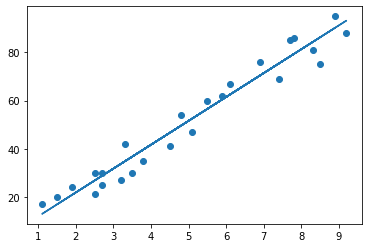

In [20]:
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

#### Let us Predict now

In [21]:
#we will bePredicting the scores using our trained algorithm
#The predict() method will predict the label of a new set of data(provided we have a trained model).
y_prediction = regressor.predict(x_test)
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### In the above step, we calculated our predictied scores using our trained model.

#### Let's compare actual and predicted data.

In [22]:
actualvspredicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})  
actualvspredicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### let us plot it using Seaborn Library

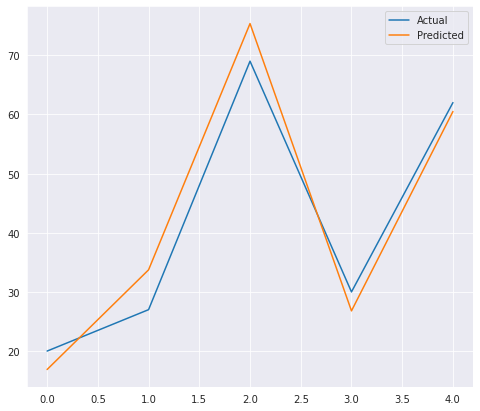

In [23]:
import seaborn as sns
sns.set_style('darkgrid')
actualvspredicted.plot(kind='line',figsize=(8,7))

# Our question : What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
hours = 9.25
predicted = regressor.coef_*hours+regressor.intercept_
print("No of Hours = ",hours)
print("Predicted Score = ",predicted[0])
y_predict=regressor.predict([[hours]])
print("Predicted Score if a student studied for 9.25 hours per day:",y_predict[0])

No of Hours =  9.25
Predicted Score =  93.69173248737539
Predicted Score if a student studied for 9.25 hours per day: 93.69173248737539


# Model Evaluation

In this step we will evaluate the performance of trained model. This step is to check how well is the model working with the given dataset.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_prediction,y_test)
mse=mean_squared_error(y_prediction,y_test)
r_score=r2_score(y_prediction,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-Squared: 0.9546785947197246


#### R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression